## Introduction

This notebook uses data science methodology to investigate homelessness in the U.S.. Through this we will be able to identify the relationships between local housing market factors and homelessness.

## Import libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Import additional libraries
from scipy.stats import uniform, randint
import xgboost as xgb

# Train-test splits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

# Model preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import RobustScaler

#Train-test splits and cross validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

from scipy.stats import uniform, randint

#Models
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, mean_absolute_error

import statsmodels.formula.api as smf

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

# Tree Model
import graphviz

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [89]:
df = pd.read_csv('https://raw.githubusercontent.com/lbomine/Homelessness/main/clean_homelessness.csv')

##### $\rightarrow$ Review the contents of the data set.

In [90]:
df.head()

,year,coc_number,rate_homeless,rate_sheltered,rate_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,proportion_one_person_households,share_under_18_with_single_parent,share_veteran_status,share_no_bachelors,medicare_reimbursements_per_enrollee,percentage_excessive_drinking,average_Jan_temperature,average_summer_temperature,total_Jan_precipitation,total_annual_precipitation
0,2017,AK-500,37.931777,32.719520,5.212257,297376,11.743647,2.438863,8.500000,15.334315,...,25.046440,23.379078,14.535126,65.634148,8.751520,0.193317,13.800000,60.799999,1.710000,16.500000
1,2017,AK-501,16.143340,13.013739,3.129602,444146,9.042710,2.249699,14.607715,13.311670,...,25.689878,19.786558,14.142518,75.560379,9.972870,0.218806,13.800000,60.799999,1.710000,16.500000
2,2017,AL-500,11.395155,9.130733,2.264422,958302,-0.852477,1.862248,19.492331,12.188416,...,29.430130,32.077599,9.149558,65.983711,9.318163,0.166727,50.995346,80.874313,6.669876,38.593376
3,2017,AL-501,9.737114,5.479135,4.257979,622361,-8.507004,1.858394,18.899839,12.539132,...,28.982967,33.668129,11.647923,74.543457,8.709522,0.165461,57.893360,81.939949,12.296666,58.519012
4,2017,AL-502,5.843235,5.013873,0.829362,265264,0.751167,1.362010,18.803186,10.374694,...,28.329298,27.959316,9.135015,82.332657,8.967195,0.149407,48.382103,79.429985,5.462999,44.778618


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   year                                        374 non-null    int64  
 1   coc_number                                  374 non-null    object 
 2   rate_homeless                               374 non-null    float64
 3   rate_sheltered                              374 non-null    float64
 4   rate_unsheltered                            374 non-null    float64
 5   total_population                            374 non-null    int64  
 6   house_price_index_2009                      374 non-null    float64
 7   log_median_rent                             374 non-null    float64
 8   utility_costs                               374 non-null    float64
 9   percentage_owners_cost_burden_2016          374 non-null    float64
 10  percentage_ren

## State your questions

The overall problem is to determine whether and how housing market factors are related to homelessness. To answer this general problem, I need to propose specific questions about the data.


1. What are some of the biggest factors on homelessness?
2. Does homelessness rates change based on location?

## Analysis

First we will determine which columns are useful for our analysis and remove the rest. 

In [92]:
variable_remove = ["total_black", "total_latino_hispanic", "total_asian", "total_pacific_islander", 
                   "total_population_0_19", "total_population_65_plus", "total_female_population", 
                   "year", "rate_unsheltered", "rate_sheltered"]

In [93]:
df = df.drop(columns=variable_remove)

In [94]:
X = df[df.columns.difference(['coc_number','rate_homeless','total_population','total_homeless'])]
y = df['rate_homeless']

In [95]:
X.head()

,HUD_unit_occupancy_rate,average_Jan_temperature,average_summer_temperature,city_or_urban,gini_coefficient_2016,high_housing_density,house_price_index_2009,log_median_rent,medicare_reimbursements_per_enrollee,migration_4_year_change,...,share_built_before_1940,share_no_bachelors,share_overcrowded_units_2016,share_renters_2016,share_under_18_with_single_parent,share_veteran_status,suburban,total_Jan_precipitation,total_annual_precipitation,utility_costs
0,99.000000,13.800000,60.799999,1,42.010002,0,11.743647,2.438863,8.751520,-0.849202,...,0.366995,65.634148,4.117406,39.727921,23.379078,14.535126,0,1.710000,16.500000,8.500000
1,99.000000,13.800000,60.799999,0,40.675701,0,9.042710,2.249699,9.972870,-0.466562,...,2.236410,75.560379,9.294898,33.922234,19.786558,14.142518,0,1.710000,16.500000,14.607715
2,95.083710,50.995346,80.874313,0,47.633533,0,-0.852477,1.862248,9.318163,-0.000659,...,7.191579,65.983711,1.235925,31.769621,32.077599,9.149558,1,6.669876,38.593376,19.492331
3,87.000801,57.893360,81.939949,1,46.713249,0,-8.507004,1.858394,8.709522,0.208839,...,3.681716,74.543457,1.712736,32.109203,33.668129,11.647923,0,12.296666,58.519012,18.899839
4,95.178665,48.382103,79.429985,0,45.165546,0,0.751167,1.362010,8.967195,0.231822,...,5.150007,82.332657,1.539988,27.708206,27.959316,9.135015,0,5.462999,44.778618,18.803186


In [96]:
X.columns

Index(['HUD_unit_occupancy_rate', 'average_Jan_temperature',
       'average_summer_temperature', 'city_or_urban', 'gini_coefficient_2016',
       'high_housing_density', 'house_price_index_2009', 'log_median_rent',
       'medicare_reimbursements_per_enrollee', 'migration_4_year_change',
       'net_migration', 'number_eviction', 'percentage_excessive_drinking',
       'percentage_owners_cost_burden_2016',
       'percentage_renters_severe_cost_burden_2016', 'poverty_rate',
       'proportion_one_person_households', 'rate_unemployment',
       'rental_vacancy_rate', 'share_HUD_units', 'share_built_before_1940',
       'share_no_bachelors', 'share_overcrowded_units_2016',
       'share_renters_2016', 'share_under_18_with_single_parent',
       'share_veteran_status', 'suburban', 'total_Jan_precipitation',
       'total_annual_precipitation', 'utility_costs'],
      dtype='object')

Scaling the data.

In [97]:
scaler = RobustScaler().fit(X)
X = pd.DataFrame(data=scaler.transform(X), columns=X.columns.values, index=X.index)

Fitting the model.

In [98]:
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          rate_homeless   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     14.25
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           5.88e-44
Time:                        06:20:09   Log-Likelihood:                -1404.4
No. Observations:                 374   AIC:                             2871.
Df Residuals:                     343   BIC:                             2992.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

The r-squared value shows a 55.5% variance for the rate of homelessness can be explained through the X values. There are only a few variables with significant p-values. But the p-value f-statistic shows this model is statistically significant.

### Train Test Split

Splitting the data into training and testing data sets.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state = 25)

Creating scaler using training data.

In [100]:
scaler = RobustScaler().fit(X_train)

Scaling transform on the predictors in the training and testing data sets.

In [101]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Fitting the model using the training data.

In [102]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

Computing the mean squared error, root mean squared error, and r-squared values.

In [103]:
MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))

print('MSE =', MSE.round(3), ' RMSE =', RMSE.round(3), 'R-squared =', R_squared.round(3))

MSE = 83.718  RMSE = 9.15 R-squared = 0.432


### Lasso Regression

Creating an array of possible alpha values then plotting the alpha values and coefficients.

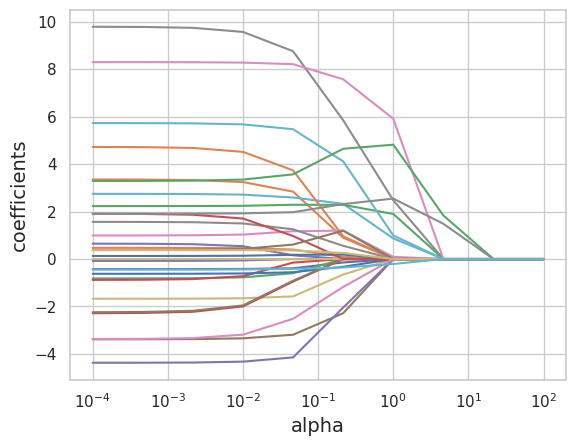

In [104]:
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

Doing a 5 fold cross validation to find alpha.

In [105]:
lassocv = LassoCV(alphas = alphas, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.21544346900318823

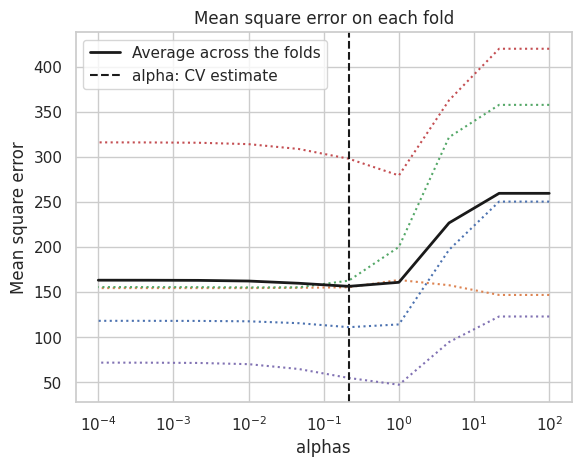

In [106]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, ":")
plt.plot(
    lassocv.alphas_ ,
    lassocv.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lassocv.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight");

Fit lasso model on training data using the best alpha to examine the coefficients.


In [107]:
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
     
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients.round(2), index = variables, columns = ['Estimated Coefficient'])

,Estimated Coefficient
intercept,13.42
HUD_unit_occupancy_rate,-0.14
average_Jan_temperature,0.90
average_summer_temperature,-0.00
city_or_urban,-0.00
gini_coefficient_2016,-0.00
high_housing_density,-2.28
house_price_index_2009,1.20
log_median_rent,5.85
medicare_reimbursements_per_enrollee,-0.65


Variable importance for lasso regression: (highest to lowest)
1. proportion_one_person_households
2. log_madian_rent
3. share_overcrowded_units_2016
4. share_HUD_units
5. migration_4_year_change

Using lasso model to predict the testing data. Then compute the mean squared error, root mean squared error, and r-squared values.

In [22]:
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))

print('MSE =', MSE_lasso.round(3), ' RMSE =', RMSE_lasso.round(3), ' R-squared =', R_squared_lasso.round(3))

MSE = 76.875  RMSE = 8.768  R-squared = 0.479


### Ridge Regression

Creating an array of possible alpha values then plotting the alpha values and coefficients.

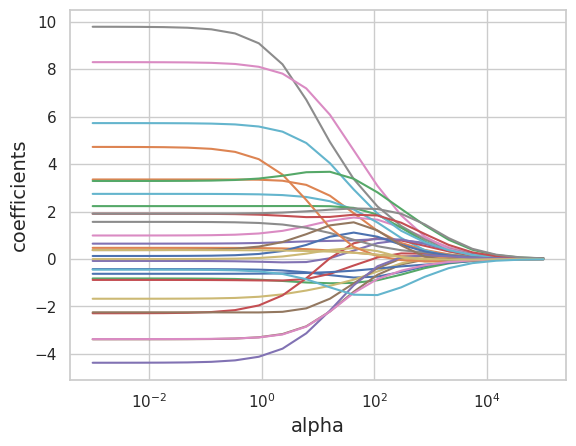

In [23]:
alphas = 10**np.linspace(-3,5,20)
ridge = Ridge(max_iter = 100000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

Doing a 5-fold cross validation to find the best alpha.

In [24]:
ridgecv = RidgeCV(alphas = alphas, cv = 5, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train);
ridgecv.alpha_

16.23776739188721

Fitting the ridge regression model on the training data.

In [25]:
ridge_reg = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [26]:
coefficients = ridge_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, ridge_reg.intercept_.round(3))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients, index = variables, columns = ['Estimated Coefficient'])

,Estimated Coefficient
intercept,13.786
HUD_unit_occupancy_rate,-0.678
average_Jan_temperature,2.668
average_summer_temperature,-1.021
city_or_urban,-0.625
gini_coefficient_2016,0.034
high_housing_density,-2.209
house_price_index_2009,1.614
log_median_rent,4.930
medicare_reimbursements_per_enrollee,-1.129


Variable importance for ridge regression: (highest to lowest)
1. proportion_one_person_households
2. log_median_rent
3. share_HUD_units
4. share_overcrowded_units_2016
5. average_Jan_temperature

Using ridge model to predict the testing data. Then compute the mean squared error, root mean squared error, and r-squared values.

In [27]:
MSE_ridge = mean_squared_error(y_test, ridge_reg.predict(X_test))
RMSE_ridge = np.sqrt(MSE_ridge)
R_squared_ridge = r2_score(y_test, ridge_reg.predict(X_test))

print('MSE =', MSE_ridge.round(3), ' RMSE =', RMSE_ridge.round(3), ' R-squared =', R_squared_ridge.round(3))

MSE = 74.698  RMSE = 8.643  R-squared = 0.493


### XGBoost

Running a randomized search for parameters to be used in the XGBoost model to predict the rate of homelessness.

In [28]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True, scoring = 'neg_mean_squared_error')

search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f2facc302b0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2facc31bd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2facc32200>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f2facc328c0>},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

Creating an XGBoost model using the best parameters.

In [29]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror")
model_xgb.set_params(**search.best_params_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8495193398909845, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3577134537520181, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.20949657265149355, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=148, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Fitting the XGBoost model on the training data.

In [30]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8495193398909845, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3577134537520181, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.20949657265149355, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=148, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Use the XGBoost model to predict the testing data.

In [31]:
y_pred_xgb = model_xgb.predict(X_test)

Creating a plot to investigate the relationship between the predicted rate of homelessness and the actual rate.

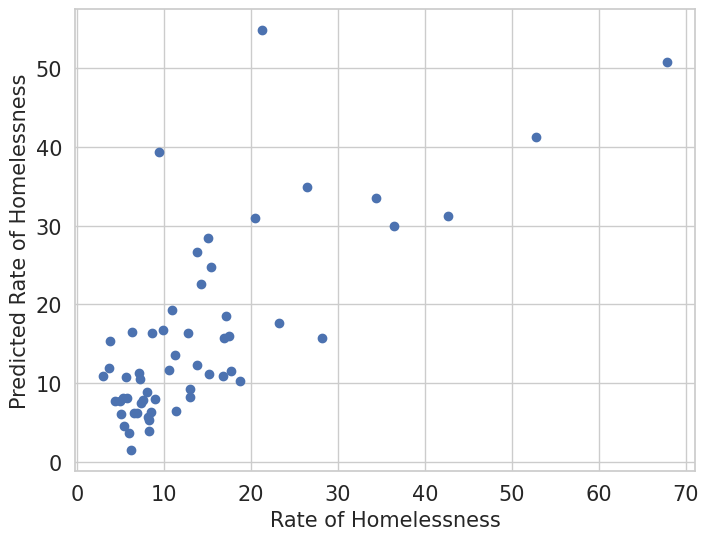

In [32]:
plt.figure(figsize = (8,6))

plt.plot(y_test, y_pred_xgb, 'o');

plt.xlabel('Rate of Homelessness', fontsize = 15)
plt.ylabel('Predicted Rate of Homelessness', fontsize = 15)

plt.tick_params(labelsize = 15)

Computing the mean squared error and the mean absolute error.

In [33]:
mean_squared_error(y_test, y_pred_xgb, squared = False).round(3)

8.831

In [34]:
mean_absolute_error(y_test, y_pred_xgb).round(3)

6.172

Both error values are relatively low, indicating that the XGBoost model is good.

Plotting the variable importance on the rate of homelessness for the XGBoost model.

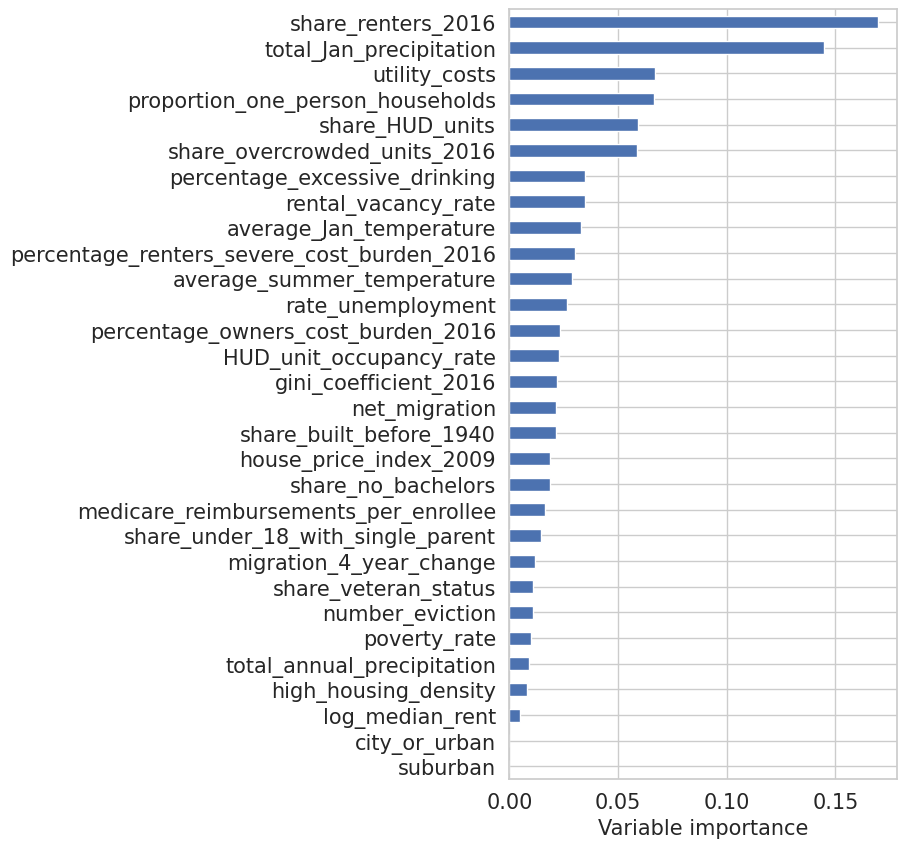

In [35]:
(pd.DataFrame(dict(cols=X.columns, imp=model_xgb.feature_importances_)).
 sort_values(by = 'imp').
 plot('cols', 'imp', 'barh', legend = False, figsize = (5,10)))

plt.ylabel('')
plt.xlabel('Variable importance', fontsize = 15)

plt.tick_params(labelsize = 15);

For the XGBoost model, share_renters_2016 and total_Jan_precipitation has the most variable importance.

## Additional Step


### $\rightarrow$ Does gentrification increase the rate of homelessness? And how can we identify it?

To be able to answer our question while using the data we already have, we can focus on differeces betwee rural and suburban areas. Thus, our main goal is to investigate if there are any relationships between rate of homelessness and area type.

For my analysis I will be using a Lasso Regression Model to examine the relationships between the rate of homelessness and type of area.

#### Suburban Data

To start I will run a train test split that includes only the suburban areas.

In [68]:
X_sub = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['suburban'] == 1]
y_sub = df['rate_homeless'].loc[df['suburban'] == 1]

In [69]:
X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_sub, y_sub, test_size=.15, random_state = 25)

Scaling the data.

In [70]:
scaler = RobustScaler().fit(X_sub_train)
X_sub_train = scaler.transform(X_sub_train)
X_sub_test = scaler.transform(X_sub_test)

Fitting the model on the training data.

In [71]:
model = sm.OLS(y_sub_train, sm.add_constant(X_sub_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')

Computing the mean squared error, root mean squared error, and r-squared values.

In [72]:
MSE_sub = mean_squared_error(y_sub_test, model.predict(sm.add_constant(X_sub_test)))
RMSE_sub = np.sqrt(MSE)
R_squared_sub = r2_score(y_sub_test, model.predict(sm.add_constant(X_sub_test)))

print('MSE =', MSE_sub.round(3), ' RMSE =', RMSE_sub.round(3), 'R-squared =', R_squared_sub.round(3))

MSE = 53.005  RMSE = 9.338 R-squared = -0.304


Start the lasso regression model for the suburban data by creating an array of possible alpha values.

In [73]:
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_sub_train, y_sub_train)
    coefs.append(lasso.coef_)

Doing a 5 fold cross validation to find the best alpha.

In [74]:
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_sub_train, y_sub_train)
lassocv.alpha_

0.0104121475330615

Fit lasso model on training data using the best alpha to examine the coefficients.

In [75]:
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_sub_train, y_sub_train)

coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

Using lasso model to predict the suburban testing data. Then compute the mean squared error, root mean squared error, and r-squared values.

In [76]:
MSE_lasso_sub = mean_squared_error(y_sub_test, lasso_reg.predict(X_sub_test))
RMSE_lasso_sub = np.sqrt(MSE_lasso)
R_squared_lasso_sub = r2_score(y_sub_test, lasso_reg.predict(X_sub_test))

print('MSE =', MSE_lasso_sub.round(3), ' RMSE =', RMSE_lasso_sub.round(3), ' R-squared =', R_squared_lasso_sub.round(3))

MSE = 51.461  RMSE = 9.111  R-squared = -0.266


#### Rural Data

Next, we will run a train test split using only the data that includes rural areas.

In [77]:
X_rural = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['suburban'] == 0]
y_rural = df['rate_homeless'].loc[df['suburban'] == 0]

In [78]:
X_rural_train, X_rural_test, y_rural_train, y_rural_test = train_test_split(X_rural, y_rural, test_size=.15, random_state = 25)

Scaling the data.

In [79]:
scaler = RobustScaler().fit(X_rural_train)
X_rural_train = scaler.transform(X_rural_train)
X_rural_test = scaler.transform(X_rural_test)

Fitting the model on the training data.

In [80]:
model = sm.OLS(y_rural_train, sm.add_constant(X_rural_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')

Computing the mean squared error, root mean squared error, and r-squared values.

In [81]:
MSE_rural = mean_squared_error(y_rural_test, model.predict(sm.add_constant(X_rural_test)))
RMSE_rural = np.sqrt(MSE)
R_squared_rural = r2_score(y_rural_test, model.predict(sm.add_constant(X_rural_test)))

print('MSE =', MSE_rural.round(3), ' RMSE =', RMSE_rural.round(3), ' R-squared =', R_squared_rural.round(3))

MSE = 87.191  RMSE = 9.338  R-squared = -0.028


Start the lasso regression model for the rural data by creating an array of possible alpha values.

In [82]:
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []

Doing a 5 fold cross validation to find alpha.

In [83]:
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_rural_train, y_rural_train)
lassocv.alpha_

0.21078609353965627

Fit lasso model on training data using the best alpha to examine the coefficients.

In [84]:
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_rural_train, y_rural_train)

coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

Using lasso model to predict the rural testing data. Then compute the mean squared error, root mean squared error, and r-squared values.

In [85]:
MSE_lasso_rural = mean_squared_error(y_sub_test, lasso_reg.predict(X_sub_test))
RMSE_lasso_rural = np.sqrt(MSE_lasso)
R_squared_lasso_rural = r2_score(y_sub_test, lasso_reg.predict(X_sub_test))

print('MSE =', MSE_lasso_rural.round(3), ' RMSE =', RMSE_lasso_rural.round(3), ' R-squared =', R_squared_lasso_rural.round(3))

MSE = 116.123  RMSE = 9.111  R-squared = -1.856


Plotting the lasso predictions for both suburban and rural areas.

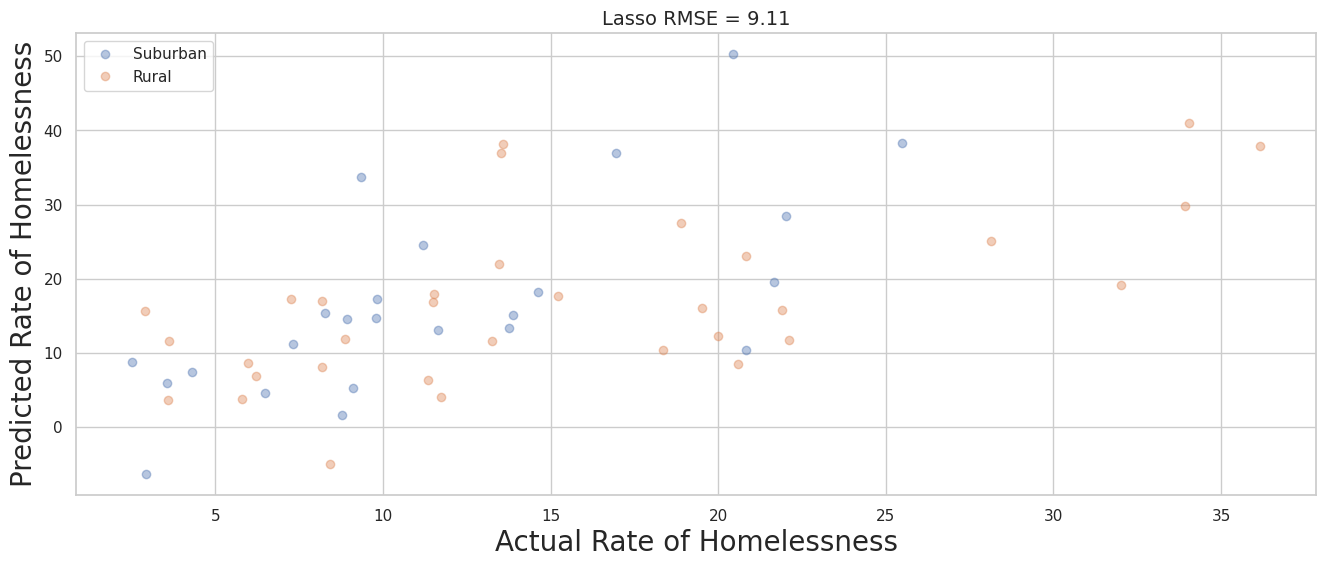

In [86]:
plt.figure(figsize=(16,6))

plt.plot(y_sub_test, lasso_reg.predict(X_sub_test),'o', alpha = 0.4, label = "Suburban")
plt.plot(y_rural_test, lasso_reg.predict(X_rural_test),'o', alpha = 0.4, label = "Rural")

plt.xlabel('Actual Rate of Homelessness',fontsize = 20)
plt.ylabel('Predicted Rate of Homelessness',fontsize = 20)
plt.title('Lasso' + ' ' + 'RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14)

plt.legend(loc="upper left")
plt.show()

From the output we find that suburban and rural homelessness rates are more saturated within the 0-25 range. This suggests that there are similar factors that influence homelessness rates across suburban and rural areas in that range. When looking at the remaining data points, they mostly represent the rural homelessness rates that have high homelessness rates, but low predicted homelessness rates.

However, when calculating the r-squared values for each lasso method they turned out negative. This indicates that the model is prediciting worse and not fitting the data nicely. Thus, choosing to model the differences between suburban and rural area rates is not very effective to accurately display the relationships to homelessness.

## Conclusion

The overall problem was to determine whether and how housing market factors are related to homelessness. After creating the Lasso, Ridge, and XGBoost models we can conlude that they all had relatively similar performance. Through cross validation, we calculated the RMSE across each model and found that they were all similar at approximately 8.6. Thus, when choosing a model we need to consider other factors that will help with better accuracy.

To answer my questions I stated earlier, each model had similar variable importance. All three models shared proportion_one_person_households, total_jan_precipitation, and share_overcrowded_units_2016 in their most significant factors on homelessness rates.

Lastly, through my additional step analysis I found that it was difficult to accurately investigate the relationship between the type of area and rate of homelessness.